In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
from datetime import datetime

In [4]:
import seaborn as sns

In [14]:
train = pd.read_csv('train.csv')

___
### 1.0 Explonary data analysis
___

#### 1.1 Get a general understanding of the dataset
___
- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
- trip_duration - duration of the trip in seconds

In [6]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [28]:
#'Jun 1 2005  1:33PM'

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [15]:
#test_datetime=datetime.strptime(train['dropoff_datetime'].iloc[0],'%Y-%m-%d %H:%M:%S')

In [16]:
#test_datetime

datetime.datetime(2016, 3, 14, 17, 32, 30)

In [51]:
#Time_labels = ['Start_Year','Start_Month','Start_Date','Start_Hour','Start_Minute','Start_Second']

In [8]:
# test whether there is any none value
# there is no None value in the table
train.isnull().any()

id                    False
vendor_id             False
pickup_datetime       False
dropoff_datetime      False
passenger_count       False
pickup_longitude      False
pickup_latitude       False
dropoff_longitude     False
dropoff_latitude      False
store_and_fwd_flag    False
trip_duration         False
dtype: bool

___
#### Convert pickup_datetime, dropoff_datetime from string to datetime object
___

In [303]:
#train['pickup_datetime']=train['pickup_datetime'].map(lambda date_str:datetime.strptime(date_str,'%Y-%m-%d %H:%M:%S').date())

In [17]:
train['pickup_datetime']=train['pickup_datetime'].map(lambda date_str:datetime.strptime(date_str,'%Y-%m-%d %H:%M:%S'))
train['dropoff_datetime']=train['dropoff_datetime'].map(lambda date_str:datetime.strptime(date_str,'%Y-%m-%d %H:%M:%S'))

2016

In [58]:
#train.info()

___
#### Convert float64 to float32, int64 to int32 to save memory
___

In [18]:
float64_labels = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']
int64_labels = ['vendor_id','passenger_count','trip_duration']

In [19]:
# function to convert from float64 to float32
for label in float64_labels:
    train[label]=train[label].astype(np.float32)

In [20]:
for label in int64_labels:
    train[label]=train[label].astype(np.int32)

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int32
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int32
pickup_longitude      1458644 non-null float32
pickup_latitude       1458644 non-null float32
dropoff_longitude     1458644 non-null float32
dropoff_latitude      1458644 non-null float32
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int32
dtypes: float32(4), int32(3), object(4)
memory usage: 83.5+ MB


___
### 1.2 View of the distribution of trip duration
___

In [21]:
def convert2hour(duration):
    """
    show how long the duration is
    """
    hour = duration//3600
    minutes = duration%3600//60
    seconds = duration%60
    print(str(hour)+' hours '+str(minutes)+' mins '+str(seconds)+' sec.')

In [22]:
# find the largest duration
convert2hour(train['trip_duration'].max())

979 hours 31 mins 22 sec.


In [23]:
labels = [('<0.5h',1800),('0.5h-1h',3600),('1h-2h',7200),('2h-5h',18000)]
def duration_dist(labels):
    for i,label in enumerate(labels):
        if i == 0:
            print(label[0]+': {}'.format(train[train['trip_duration']<=labels[i][1]]['trip_duration'].count()))
        else:
            print(label[0]+': {}'.format(train[(train['trip_duration']<=labels[i][1])&(train['trip_duration']>labels[i-1][1])]['trip_duration'].count()))
    print('else:{}'.format(train[train['trip_duration']>labels[-1][1]]['trip_duration'].count()))

In [24]:
duration_dist(labels)

<0.5h: 1345526
0.5h-1h: 100801
1h-2h: 10064
2h-5h: 181
else:2072


___
We can see that

1. **less than 0.5h: 1345526**

2. inbetween 0.5h and 1h: 100801

3. inbetween 1h and 2h: 10064

4. between 2h and 5h: 181

5. else: 2072

### Observation: 

    - Most of the trips are short-period trip, less than half an hour;
    - Trips that are longer than 2 hours are relatively rare.

In [99]:
# 2 hour
#twoHours = 7200
#train[(train['trip_duration']>7200) & (train['trip_duration']<10000)]['trip_duration'].count()

(0, 4000)

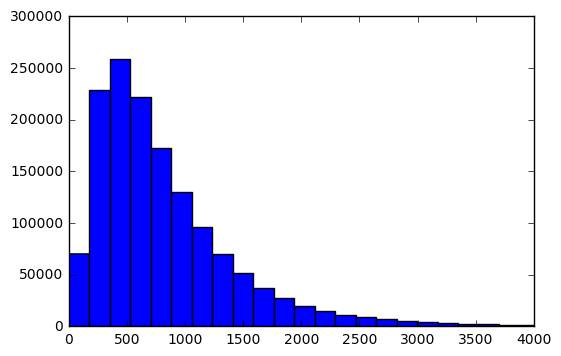

In [77]:
plt.hist(train['trip_duration'],bins=20000)
plt.xlim(0,4000)

___
#### Next, let's have a look at the trips > 5 hour

** Real thing or just outliers?**
___

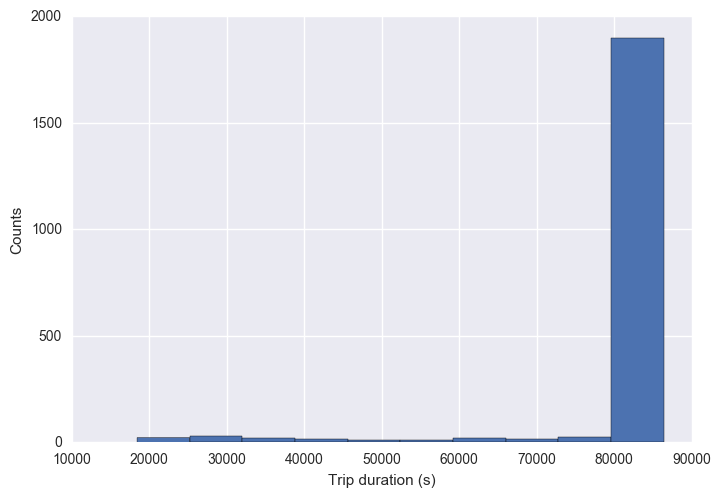

In [25]:
plt.hist(train[(train['trip_duration']>18000) & (train['trip_duration']<100000)]['trip_duration'])
plt.ylabel('Counts')
plt.xlabel('Trip duration (s)')

___
#### Observation for trips longer than 5 hours:
    - We find there are much larger events between 80000 and 90000 seconds.
    - There could be some special pattern there.

In [26]:
train[(train['trip_duration']>70000) & (train['trip_duration']<90000)]['trip_duration'].max()

86392

In [27]:
train[(train['trip_duration']>70000) & (train['trip_duration']<90000)]['trip_duration'].min()

70012

In [28]:
train[(train['trip_duration']>70000) & (train['trip_duration']<90000)]['trip_duration'].count()

1932

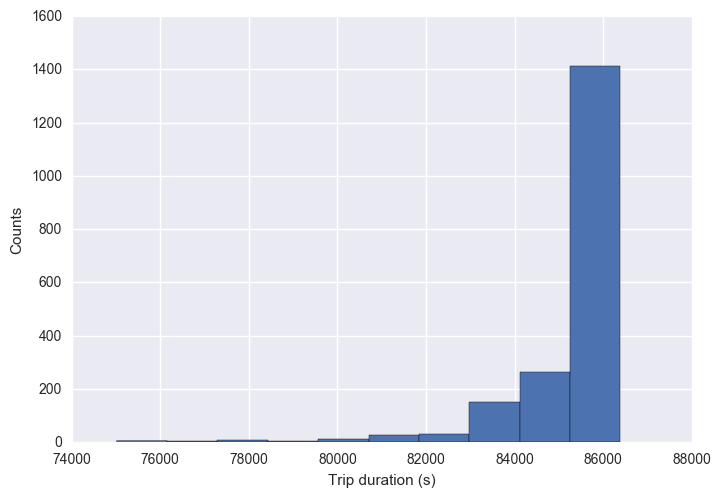

In [29]:
plt.hist(train[(train['trip_duration']>75000) & (train['trip_duration']<87000)]['trip_duration'])
plt.ylabel('Counts')
plt.xlabel('Trip duration (s)')

In [148]:
#train[(train['trip_duration']>80000) & (train['trip_duration']<87000)]

### 1.3 Distribution of locations of all these trips
- pickup position
- dropoff position

In [149]:
#plt.hist(train[train['store_and_fwd_flag']=='Y']['trip_duration'])

In [155]:
#list(train.pickup_longitude)

In [30]:
pickup_longitude = list(train.pickup_longitude)
pickup_latitude = list(train.pickup_latitude)
dropoff_longitude = list(train.dropoff_longitude)
dropoff_latitude = list(train.dropoff_latitude)

(-75, -73)

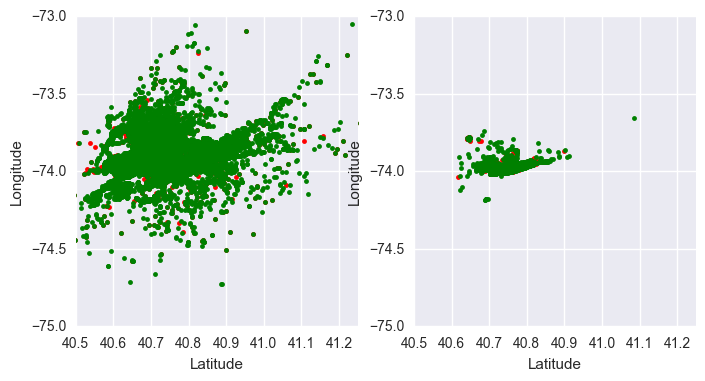

In [31]:
fig,axes=plt.subplots(1,2,figsize=(8,4))
axes[0].plot(pickup_latitude,pickup_longitude,'.',color='r')
axes[0].plot(dropoff_latitude,dropoff_longitude,'.',color='g')
axes[0].set_xlim(40.5,41.25)
axes[0].set_ylim(-75,-73)
axes[0].set_xlabel('Latitude')
axes[0].set_ylabel('Longitude')
#fig,ax=plt.subplots(1,1)
axes[1].plot(list(train[(train['trip_duration']>75000) & (train['trip_duration']<87000)].pickup_latitude),list(train[(train['trip_duration']>75000) & (train['trip_duration']<87000)].pickup_longitude),'.',color='r')
axes[1].plot(list(train[(train['trip_duration']>75000) & (train['trip_duration']<87000)].dropoff_latitude),list(train[(train['trip_duration']>75000) & (train['trip_duration']<87000)].dropoff_longitude),'.',color='g')
#ax.plot(dropoff_latitude,dropoff_longitude,'.',color='g')
#ax.set_xlim(40.5,41.25)
#ax.set_ylim(-75,-73)
axes[1].set_xlabel('Latitude')
axes[1].set_ylabel('Longitude')
axes[1].set_xlim(40.5,41.25)
axes[1].set_ylim(-75,-73)

In [181]:
#pickup_longitude = list(train.pickup_longitude)
#pickup_latitude = list(train.pickup_latitude)
#fig,ax=plt.subplots(1,1)
#figure(figsize = (10,10))
#ax.plot(pickup_longitude,pickup_latitude,'.', alpha = 0.4, markersize = 0.05)
#ax.set_xlim(-74.03,-73.77)
#ax.set_ylim(40.63,40.85)
#plt.show()

___
### 1.4 Distance between starting point and ending point
___

In [32]:
import geopy
import geopy.distance as geo_dist

In [33]:
def manhattan_distance(x1,y1,x2,y2):
    return geo_dist.vincenty((x1,y1),(x1,y2)).miles+geo_dist.vincenty((x1,y2),(x2,y2)).miles

In [34]:
x1=train['pickup_latitude'].iloc[0]
y1=train['pickup_longitude'].iloc[0]
x2=train['dropoff_latitude'].iloc[0]
y2=train['dropoff_longitude'].iloc[0]

In [35]:
manhattan_distance(x1,y1,x2,y2)

1.0804775789748107

In [36]:
vec_md=np.vectorize(manhattan_distance)

In [37]:
md_array=vec_md(train['pickup_latitude'],train['pickup_longitude'],train['dropoff_latitude'],train['dropoff_longitude'])

In [230]:
#md_array

array([ 1.08047758,  1.51211907,  5.09608953, ...,  6.6153722 ,
        0.94589912,  0.9625826 ])

In [38]:
train['Manhattan distance (miles)']=md_array

In [234]:
#train.head()

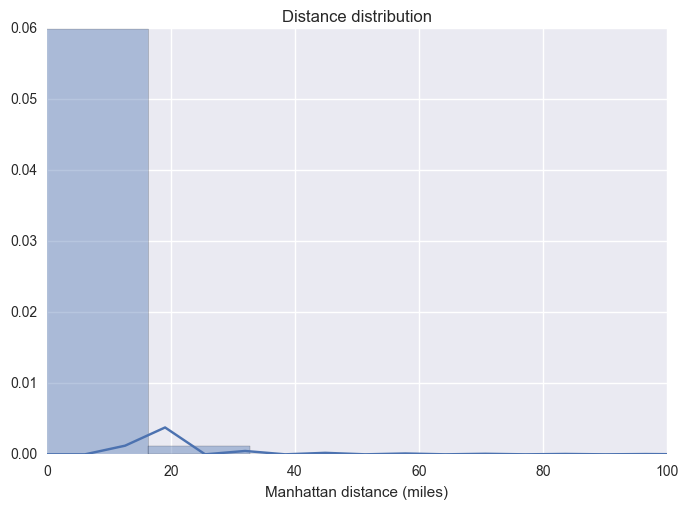

In [39]:
_, ax = plt.subplots(1,1)
#ax.hist(train['Manhattan distance (miles)'])
ax.set_title('Distance distribution')
ax.set_xlim(0,100)
ax.set_xlabel('Miles')
sns.distplot(train['Manhattan distance (miles)'])

In [40]:
totCount=train['Manhattan distance (miles)'].count()

In [41]:
below5=train[train['Manhattan distance (miles)']<5]['Manhattan distance (miles)'].count()

In [42]:
bet05and10=train[(train['Manhattan distance (miles)']>=5)&(train['Manhattan distance (miles)']<10)]['Manhattan distance (miles)'].count()

In [43]:
bet10and15=train[(train['Manhattan distance (miles)']>=10)&(train['Manhattan distance (miles)']<15)]['Manhattan distance (miles)'].count()

In [44]:
bet15and20=train[(train['Manhattan distance (miles)']>=15)&(train['Manhattan distance (miles)']<20)]['Manhattan distance (miles)'].count()

In [266]:
#below20=train[train['Manhattan distance (miles)']<20]['Manhattan distance (miles)'].count()

In [45]:
bet20and50=train[(train['Manhattan distance (miles)']>20)&(train['Manhattan distance (miles)']<50)]['Manhattan distance (miles)'].count()

In [46]:
bet50and100=train[(train['Manhattan distance (miles)']>50)&(train['Manhattan distance (miles)']<100)]['Manhattan distance (miles)'].count()

In [47]:
larger100=train[train['Manhattan distance (miles)']>100]['Manhattan distance (miles)'].count()

In [48]:
print('Below 5 miles: {}%\n'.format(below5/totCount*100))
print('Between 5 miles and 10 miles: {}%\n'.format(bet05and10/totCount*100))
print('Between 10 miles and 15 miles: {}%\n'.format(bet10and15/totCount*100))
print('Between 20 miles and 50 miles: {}%\n'.format(bet20and50/totCount*100))
print('Between 50 miles and 100 miles: {}%\n'.format(bet50and100/totCount*100))
print('Longer than 100 miles: {}%\n'.format(larger100/totCount*100))

Below 5 miles: 86.72095453037204%

Between 5 miles and 10 miles: 9.175096870792325%

Between 10 miles and 15 miles: 1.8078434491212387%

Between 20 miles and 50 miles: 0.17838485607180365%

Between 50 miles and 100 miles: 0.0019881478962652985%

Longer than 100 miles: 0.0010969091841463716%



In [49]:
print('minimum distance: {}'.format(train['Manhattan distance (miles)'].min()))
print('maximum distance: {}'.format(train['Manhattan distance (miles)'].max()))

minimum distance: 0.0
maximum distance: 819.1666768000741


In [327]:
#train.head()

In [277]:
#sns.kdeplot(train['Manhattan distance (miles)'],train['trip_duration'])

In [50]:
sampled_train=train[(train['Manhattan distance (miles)']<10)&(train['trip_duration']<7200)].sample(50000)

/Users/zhenzhu/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/zhenzhu/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


(0, 1500)

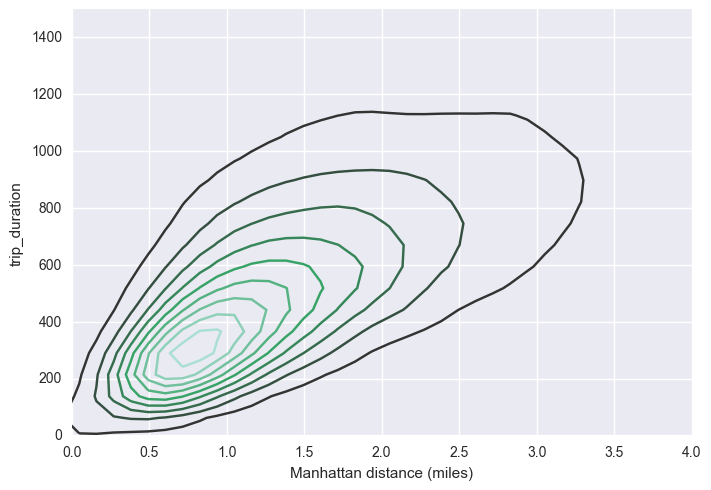

In [51]:
_,ax = plt.subplots(1,1)
sns.kdeplot(sampled_train['Manhattan distance (miles)'],sampled_train['trip_duration'],ax=ax,cbar=True)
ax.set_xlim(0,4)
ax.set_ylim(0,1500)

___
### 1.5 Average velocity of the trip
___

In [52]:
def velocity(dist,duration):
    """
    dist: mile
    duration: sec
    return: mile/hour
    """
    return dist/duration*3600

In [53]:
vec_velocity = np.vectorize(velocity)

In [54]:
train['volecity (miles/hour)']=vec_velocity(train['Manhattan distance (miles)'],train['trip_duration'])

In [55]:
#new_train = pd.read_csv('train.csv')

In [56]:
#train['pickup_datetime']=new_train['pickup_datetime'].map(lambda date_str:datetime.strptime(date_str,'%Y-%m-%d %H:%M:%S'))
#train['dropoff_datetime']=new_train['dropoff_datetime'].map(lambda date_str:datetime.strptime(date_str,'%Y-%m-%d %H:%M:%S'))

In [57]:
#del new_train

In [61]:
train['pickup_datetime'].iloc[1].minute

43

In [62]:
train['pickup_hour_min']=train['pickup_datetime'].map(lambda x:x.hour*24+x.minute)

In [63]:
train['pickup_hour']=train['pickup_datetime'].map(lambda x:x.hour)

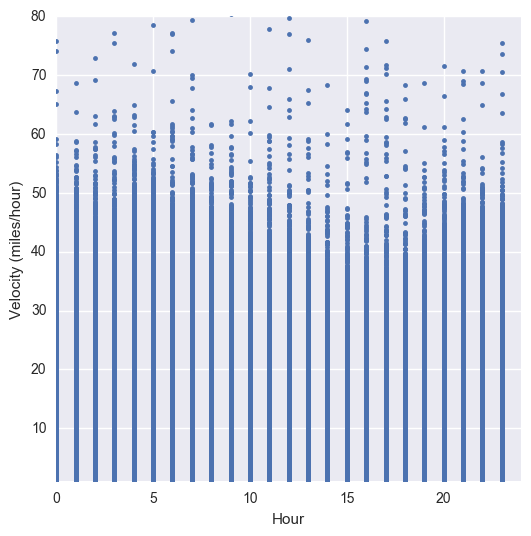

In [64]:
_, ax_v_hour = plt.subplots(1,1,figsize=(6,6))
ax_v_hour.plot(train['pickup_hour'],train['volecity (miles/hour)'],'.')
ax_v_hour.set_ylim(1,80)
ax_v_hour.set_xlim(0,24)
ax_v_hour.set_xlabel('Hour')
ax_v_hour.set_ylabel('Velocity (miles/hour)')

In [65]:
# let's do average speed 
Hours = [i for i in range(0,25)]

In [66]:
ave_speed = []
for hour in Hours:
    ave_speed.append(train[train['pickup_hour']==hour]['volecity (miles/hour)'].mean())

(0, 25)

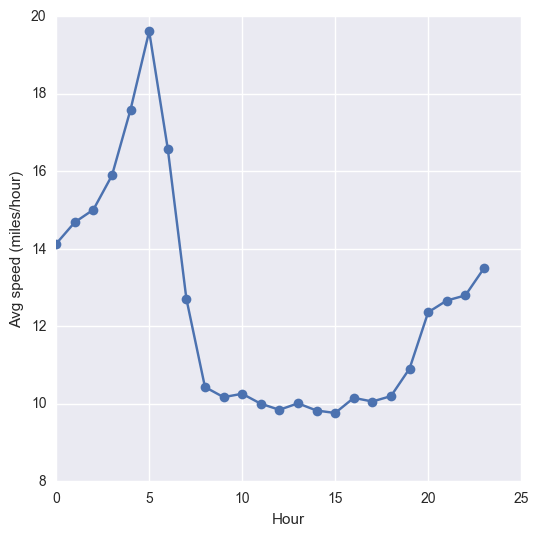

In [108]:
_,ax_avg_V = plt.subplots(1,1,figsize=(6,6))
ax_avg_V.plot(Hours,ave_speed,'o-')
ax_avg_V.set_xlabel('Hour')
ax_avg_V.set_ylabel('Avg speed (miles/hour)')
ax_avg_V.set_xlim(0,25)

___
### Observations: velocity can be really small < 1 miles/hour or super high > 80 miles/hour
#### These are likely to be outliers.

___


___
### 1.6 Several methods to eliminate outliers
___

#### 1.6.1 Analysis of velocity
    - velocity larger than 80 miles/hour: in NYC, it is unexpected to have velocity > 80 miles/hour
    - velocity smaller than 2 miles/hour: too slow to be true
___

In [68]:
# velocity larger than 80
# in NYC, it is unexpected to have velocity > 80 miles/hour
#
train[train['volecity (miles/hour)']>80].count()

id                            178
vendor_id                     178
pickup_datetime               178
dropoff_datetime              178
passenger_count               178
pickup_longitude              178
pickup_latitude               178
dropoff_longitude             178
dropoff_latitude              178
store_and_fwd_flag            178
trip_duration                 178
Manhattan distance (miles)    178
volecity (miles/hour)         178
pickup_hour_min               178
pickup_hour                   178
dtype: int64

In [69]:
train[train['volecity (miles/hour)']<2].count()

id                            20830
vendor_id                     20830
pickup_datetime               20830
dropoff_datetime              20830
passenger_count               20830
pickup_longitude              20830
pickup_latitude               20830
dropoff_longitude             20830
dropoff_latitude              20830
store_and_fwd_flag            20830
trip_duration                 20830
Manhattan distance (miles)    20830
volecity (miles/hour)         20830
pickup_hour_min               20830
pickup_hour                   20830
dtype: int64

___
#### 1.6.2 Analysis of trip distance
    - if the trip distance is less than 0.1 mile (this does not help our model)
    - if the trip distance is too large > 100 miles (there are only 16 of such trip)
___

In [70]:
train[(train['Manhattan distance (miles)']<0.1) | (train['Manhattan distance (miles)']>100)].count()

id                            14150
vendor_id                     14150
pickup_datetime               14150
dropoff_datetime              14150
passenger_count               14150
pickup_longitude              14150
pickup_latitude               14150
dropoff_longitude             14150
dropoff_latitude              14150
store_and_fwd_flag            14150
trip_duration                 14150
Manhattan distance (miles)    14150
volecity (miles/hour)         14150
pickup_hour_min               14150
pickup_hour                   14150
dtype: int64

___
#### 1.6.2 Analysis of trip duration
    - if the trip duration is less than 60 s (this does not help our model)
    - if the trip duration is too large > 850000 s  (there are only 16 of such trip)
___

In [71]:
train[train['trip_duration']<60].count()

id                            8595
vendor_id                     8595
pickup_datetime               8595
dropoff_datetime              8595
passenger_count               8595
pickup_longitude              8595
pickup_latitude               8595
dropoff_longitude             8595
dropoff_latitude              8595
store_and_fwd_flag            8595
trip_duration                 8595
Manhattan distance (miles)    8595
volecity (miles/hour)         8595
pickup_hour_min               8595
pickup_hour                   8595
dtype: int64

___
### 1.7 Analyse the year and date
___

In [72]:
train['pickup_year']=train['pickup_datetime'].map(lambda x:x.year)

In [73]:
train['pickup_month']=train['pickup_datetime'].map(lambda x:x.month)

In [74]:
train['pickup_day']=train['pickup_datetime'].map(lambda x:x.day)

In [98]:
train['pickup_weekday']=train['pickup_datetime'].map(lambda x:x.weekday())

In [100]:
#train['pickup_weekday'].iloc[1]

In [110]:
float64_labels2=['volecity (miles/hour)','Manhattan distance (miles)']

In [111]:
for label in float64_labels2:
    train[label]=train[label].astype(np.float32)

In [112]:
int64_labels2=['pickup_hour_min','pickup_hour','pickup_year','pickup_month','pickup_day','pickup_weekday']

In [113]:
for label in int64_labels2:
    train[label]=train[label].astype(np.int32)

In [75]:
train['pickup_year'].unique()

array([2016])

#### Note: only the data in 2016 is shown.
___

In [76]:
train['pickup_month'].unique()

array([3, 6, 1, 4, 5, 2])

In [79]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'Manhattan distance (miles)', 'volecity (miles/hour)',
       'pickup_hour_min', 'pickup_hour', 'pickup_year', 'pickup_month',
       'pickup_day'],
      dtype='object')

In [80]:
avg_speed_month = []
for i in range(6):
    avg_speed_month.append(train[train['pickup_month']==i+1]['volecity (miles/hour)'].mean())

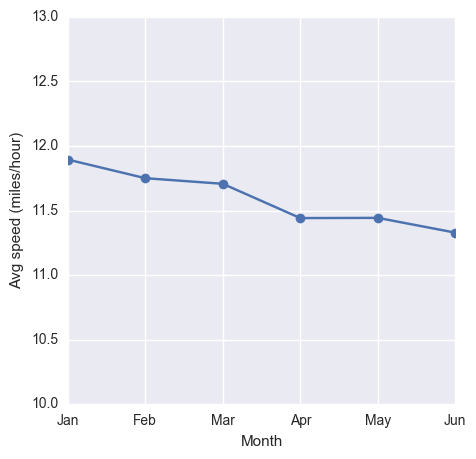

In [93]:
month_labels = ['Jan','Feb','Mar','Apr','May','Jun']
_, ax_avg_speed_month = plt.subplots(1,1,figsize=(5,5))
ax_avg_speed_month.plot([0,1,2,3,4,5],avg_speed_month,'o-')
ax_avg_speed_month.set_xticklabels(month_labels)
ax_avg_speed_month.set_xlim(0,5)
ax_avg_speed_month.set_ylim(10,13)
ax_avg_speed_month.set_xlabel('Month')
ax_avg_speed_month.set_ylabel('Avg speed (miles/hour)')

#### Months: from Jan to June
**Possible feature: difference between winter and summer**
___

In [94]:
train['pickup_datetime'].iloc[1].weekday()

6

In [101]:
train['pickup_weekday'].unique()

array([0, 6, 1, 2, 5, 4, 3])

In [102]:
avg_speed_weekday = []
for i in range(7):
    avg_speed_weekday.append(train[train['pickup_weekday']==i]['volecity (miles/hour)'].mean())

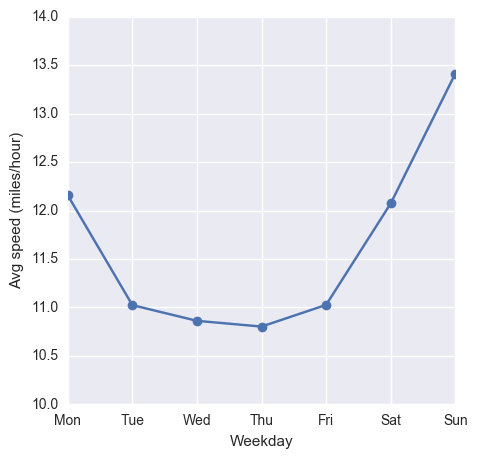

In [106]:
weekday_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
_, ax_avg_speed_weekday = plt.subplots(1,1,figsize=(5,5))
ax_avg_speed_weekday.plot([0,1,2,3,4,5,6],avg_speed_weekday,'o-')
ax_avg_speed_weekday.set_xticklabels(weekday_labels)
#ax_avg_speed_month.set_xlim(0,6)
ax_avg_speed_weekday.set_ylim(10,14)
ax_avg_speed_weekday.set_xlabel('Weekday')
ax_avg_speed_weekday.set_ylabel('Avg speed (miles/hour)')

In [115]:
#train.info()

In [126]:
#train.head()

___
### 1.7 Clustering
___

In [117]:
from sklearn.cluster import KMeans

In [118]:
xlim = [-74.03, -73.77]
ylim = [40.63, 40.85]
train = train[(train['pickup_longitude']> xlim[0]) & (train['pickup_longitude'] < xlim[1]) & (train['dropoff_longitude']> xlim[0]) & (train['dropoff_longitude'] < xlim[1]) & (train['pickup_latitude']> ylim[0]) & (train['pickup_latitude'] < ylim[1])&(train['dropoff_latitude']> ylim[0]) & (train['dropoff_latitude'] < ylim[1])]
#train = train[(train['dropoff_longitude']> xlim[0]) & (train['dropoff_longitude'] < xlim[1])]
#train = train[(train['pickup_latitude']> ylim[0]) & (train['pickup_latitude'] < ylim[1])]
#train = train[(train['dropoff_latitude']> ylim[0]) & (train['dropoff_latitude'] < ylim[1])]

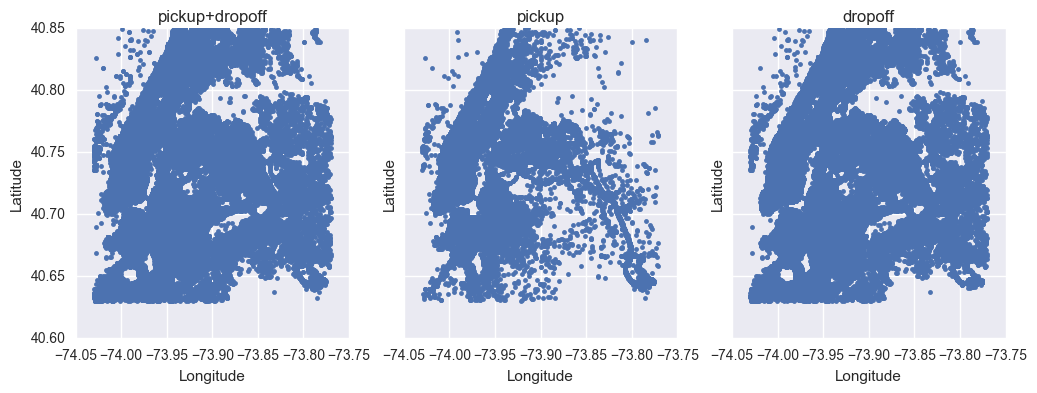

In [119]:
longitude = list(train['pickup_longitude']) + list(train['dropoff_longitude'])
latitude = list(train['pickup_latitude']) + list(train['dropoff_latitude'])
_,ax_loc = plt.subplots(1,3,figsize = (12,4),sharey=True)
ax_loc[0].plot(longitude,latitude,'.')
ax_loc[0].set_xlabel('Longitude')
ax_loc[0].set_ylabel('Latitude')
ax_loc[0].set_title('pickup+dropoff')
ax_loc[1].plot(train['pickup_longitude'],train['pickup_latitude'],'.')
ax_loc[1].set_xlabel('Longitude')
ax_loc[1].set_ylabel('Latitude')
ax_loc[1].set_title('pickup')
ax_loc[2].plot(train['dropoff_longitude'],train['dropoff_latitude'],'.')
ax_loc[2].set_xlabel('Longitude')
ax_loc[2].set_ylabel('Latitude')
ax_loc[2].set_title('dropoff')
#plt.show()

In [122]:
loc_train = pd.DataFrame()
loc_train['longitude'] = longitude
loc_train['latitude'] = latitude

In [129]:
for label in ['longitude','latitude']:
    loc_train[label]=loc_train[label].astype(np.float32)

In [130]:
loc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2877242 entries, 0 to 2877241
Data columns (total 2 columns):
longitude    float32
latitude     float32
dtypes: float32(2)
memory usage: 22.0 MB


In [131]:
kmeans = KMeans(n_clusters=15, random_state=3, n_init = 10).fit(loc_train)
loc_train['label'] = kmeans.labels_

In [142]:
kmeans.cluster_centers_[:,0].tolist()

[-73.97098821789108,
 -73.7854240738134,
 -73.98908613117,
 -73.83756049369947,
 -74.00178535086539,
 -73.9470826440592,
 -73.86901037217136,
 -73.97461973802807,
 -73.98588043485961,
 -73.98104092867011,
 -73.95545951597393,
 -73.98666519600756,
 -73.94536259324789,
 -73.9212927342571,
 -74.00816448816285]

In [143]:
center_logitude=kmeans.cluster_centers_[:,0].tolist()
center_latitude=kmeans.cluster_centers_[:,1].tolist()

In [148]:
len(kmeans.labels_)

2877242

In [154]:
## put the area information into the train pd file
#
train['pickup_area']=kmeans.labels_[0:1438621]
train['dropoff_area']=kmeans.labels_[1438621:]

In [207]:
#train.info()
#train['dropoff_area']

In [161]:
from sklearn.preprocessing import OneHotEncoder

In [202]:
area_info_ohe=OneHotEncoder(n_values=15,dtype=np.int32)

In [215]:
#train[['dropoff_area','pickup_area']]

In [218]:
# realize hotencode
pickup_prefix = 'pickup_area_'
dropoff_prefix = 'dropoff_area_'
for i in range(15):
    train[pickup_prefix+str(i)]=train['pickup_area'].map(lambda x: 1 if x==i else 0) 
    train[dropoff_prefix+str(i)]=train['dropoff_area'].map(lambda x: 1 if x==i else 0) 

In [222]:
train['store_and_fwd_flag']=train['store_and_fwd_flag'].map(lambda x: 0 if x=='N' else 1)

In [224]:
for i in range(15):
    train[pickup_prefix+str(i)]=train[pickup_prefix+str(i)].astype(np.int32)
    train[dropoff_prefix+str(i)]=train[dropoff_prefix+str(i)].astype(np.int32)

In [226]:
train['store_and_fwd_flag']=train['store_and_fwd_flag'].astype(np.int32)

In [216]:
#a=area_info_ohe.transform(train[['pickup_area','dropoff_area']])

In [217]:
#a.toarray()

In [ ]:
# train['pickup_area']

In [137]:
"""
np.array([[-73.97098822,  40.75844618],
       [-73.78542407,  40.64661384],
       [-73.98908613,  40.72686003],
       [-73.83756049,  40.71720179],
       [-74.00178535,  40.73949117],
       [-73.94708264,  40.81114993],
       [-73.86901037,  40.77156999],
       [-73.97461974,  40.78717709],
       [-73.98588043,  40.74641059],
       [-73.98104093,  40.67834814],
       [-73.95545952,  40.77578469],
       [-73.9866652 ,  40.76337583],
       [-73.94536259,  40.70511766],
       [-73.92129273,  40.75657385],
       [-74.00816449,  40.71368017]])
       """

'\nnp.array([[-73.97098822,  40.75844618],\n       [-73.78542407,  40.64661384],\n       [-73.98908613,  40.72686003],\n       [-73.83756049,  40.71720179],\n       [-74.00178535,  40.73949117],\n       [-73.94708264,  40.81114993],\n       [-73.86901037,  40.77156999],\n       [-73.97461974,  40.78717709],\n       [-73.98588043,  40.74641059],\n       [-73.98104093,  40.67834814],\n       [-73.95545952,  40.77578469],\n       [-73.9866652 ,  40.76337583],\n       [-73.94536259,  40.70511766],\n       [-73.92129273,  40.75657385],\n       [-74.00816449,  40.71368017]])\n       '

In [378]:
#loc_train['label'].max()

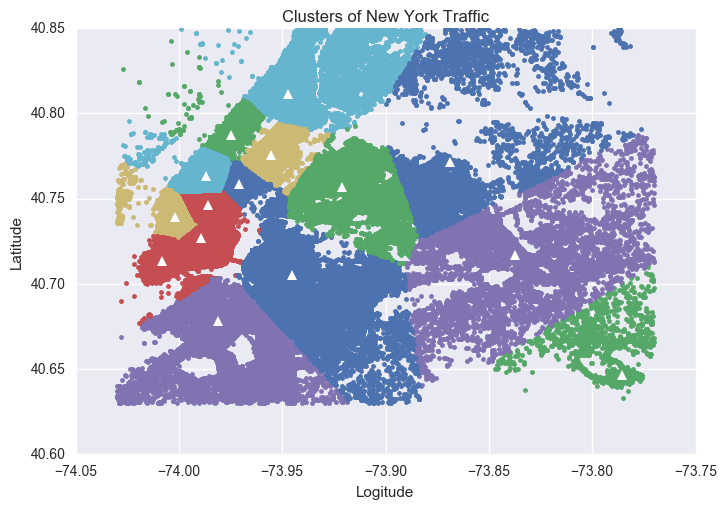

In [146]:
for label in range(15):
    plt.plot(loc_train[loc_train['label']==label]['longitude'],loc_train[loc_train['label']==label]['latitude'],'.')
plt.plot(center_logitude,center_latitude,'^',color='w')
plt.xlabel('Logitude')
plt.ylabel('Latitude')
plt.title('Clusters of New York Traffic')

In [325]:
### determine  a point belowing to a cluster or not
### use distance as a possibility ratio
#
# one-hot encoding
#
def shrink(curString):
            
            if len(curString)== 0:
                return ''
            ret = curString[0]
            for i in range(1,len(curString)):
                if curString[i]!=curString[i-1]:
                    ret += curString[i]
            return ret

In [329]:
def helper(curString):
            if len(curString)==1 or len(curString)==0:
                return len(curString)
            ret = 1 + helper(curString[1:])
            curChar = curString[0]
            for i in range(1,len(curString)):
                if curString[i]==curChar:
                    ret = min(ret, 1+helper(curString[1:i]))+helper(curString[i+1:])
            return ret

In [335]:
shrink("baacdddaaddaaaaccbddbcabdaabdbbcdcbbbacbddcabcaaa")

'bacdadacbdbcabdabdbcdcbacbdcabca'

In [337]:
list([1,2])

[1, 2]

In [353]:
        def roll(startPos,direction,visited):
            finalPos = list(startPos)
            while finalPos[0]>=0 and finalPos[0]<len(maze) and finalPos[1]>=0 and finalPos[1]<len(maze[0]) and maze[finalPos[0]][finalPos[1]]!=1:
                finalPos[0]+=direction[0]
                finalPos[1]+=direction[1]
                if finalPos[0]>=0 and finalPos[0]<len(maze) and finalPos[1]>=0 and finalPos[1]<len(maze[0]) and maze[finalPos[0]][finalPos[1]]!=1:
                    maze[finalPos[0]][finalPos[1]]=2
                if finalPos==destination:
                    passed[0]= True
                    #return finalPos
            finalPos[0]-=direction[0]
            finalPos[1]-=direction[1]
            visited.append(finalPos)
            return finalPos

In [357]:
def PathorNot(maze, start, destination):
        directions = {(0,1),(0,-1),(1,0),(-1,0)}
        passed = [False]
        stack = [start]
        visited = [start]
        while stack:
            cur = stack.pop()
            for direction in directions:
                nextPos = list(roll(cur,direction,visited))
                if passed[0]==True:
                    return passed[0]
                if nextPos not in visited:
                    stack.append(nextPos)
        return passed[0]

In [358]:
maze = [[0,0,1,0,0],[0,0,0,0,0],[0,0,0,1,0],[1,1,0,1,1],[0,0,0,0,0]]
start = [0,4]
destination = [4,4]

In [359]:
PathorNot(maze,start,destination)

False

In [361]:
a=[1,2]
b=a

In [367]:
#b[0]+=1
#a
c=3
a=b=c

In [368]:
a-=1
print(a,b)

2 3


In [ ]:
[[0,0,1,0,0],
 [0,0,0,0,0],
 [0,0,0,1,0],
 [1,1,0,1,1],
 [0,0,0,0,0]]

___
### 1.8 the relationship between number of passagers and trip duration
___

In [240]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'Manhattan distance (miles)', 'volecity (miles/hour)',
       'pickup_hour_min', 'pickup_hour', 'pickup_year', 'pickup_month',
       'pickup_day', 'pickup_weekday', 'pickup_area', 'dropoff_area',
       'pickup_area_0', 'dropoff_area_0', 'pickup_area_1', 'dropoff_area_1',
       'pickup_area_2', 'dropoff_area_2', 'pickup_area_3', 'dropoff_area_3',
       'pickup_area_4', 'dropoff_area_4', 'pickup_area_5', 'dropoff_area_5',
       'pickup_area_6', 'dropoff_area_6', 'pickup_area_7', 'dropoff_area_7',
       'pickup_area_8', 'dropoff_area_8', 'pickup_area_9', 'dropoff_area_9',
       'pickup_area_10', 'dropoff_area_10', 'pickup_area_11',
       'dropoff_area_11', 'pickup_area_12', 'dropoff_area_12',
       'pickup_area_13', 'dropoff_area_13', 'pickup_area_14',
       

In [257]:
avg_miles_passenger=[]
for i in range(7):
    avg_miles_passenger.append(train[train['passenger_count']==i]['Manhattan distance (miles)'].mean())

In [258]:
avg_period_passenger=[]
for i in range(7):
    avg_period_passenger.append(train[train['passenger_count']==i]['trip_duration'].mean())

In [369]:
print('No passenger:{}'.format(train[train['passenger_count']==0]['Manhattan distance (miles)'].mean()))
print('One passenger:{}'.format(train[train['passenger_count']==1]['Manhattan distance (miles)'].mean()))
print('Two passengers:{}'.format(train[train['passenger_count']==2]['Manhattan distance (miles)'].mean()))
print('Three passengers:{}'.format(train[train['passenger_count']==3]['Manhattan distance (miles)'].mean()))
print('Four passengers:{}'.format(train[train['passenger_count']==4]['Manhattan distance (miles)'].mean()))
print('Five passengers:{}'.format(train[train['passenger_count']==5]['Manhattan distance (miles)'].mean()))
print('Six passengers:{}'.format(train[train['passenger_count']==6]['Manhattan distance (miles)'].mean()))

No passenger:0.6292356848716736
One passenger:2.603166341781616
Two passengers:2.8054592609405518
Three passengers:2.7167375087738037
Four passengers:2.7808661460876465
Five passengers:2.710134983062744
Six passengers:2.636997938156128


In [370]:
print('No passenger:{}'.format(train[train['passenger_count']==0]['passenger_count'].count()))
print('One passenger:{}'.format(train[train['passenger_count']==1]['passenger_count'].count()))
print('Two passengers:{}'.format(train[train['passenger_count']==2]['passenger_count'].count()))
print('Three passengers:{}'.format(train[train['passenger_count']==3]['passenger_count'].count()))
print('Four passengers:{}'.format(train[train['passenger_count']==4]['passenger_count'].count()))
print('Five passengers:{}'.format(train[train['passenger_count']==5]['passenger_count'].count()))
print('Six passengers:{}'.format(train[train['passenger_count']==6]['passenger_count'].count()))

No passenger:53
One passenger:1019542
Two passengers:207083
Three passengers:59086
Four passengers:28001
Five passengers:77100
Six passengers:47756


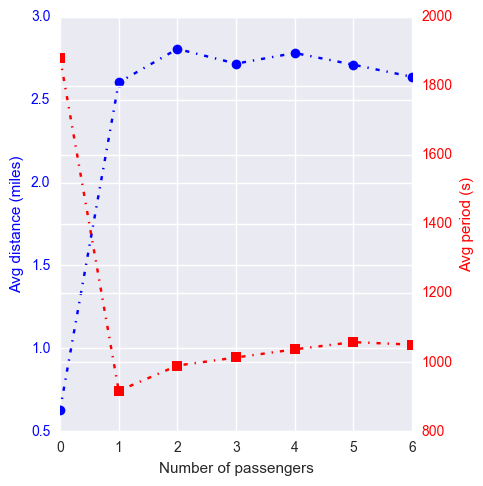

In [260]:
#
fig, ax_passger = plt.subplots(figsize=(5,5))
#t = np.arange(0.01, 10.0, 0.01)
#s1 = np.exp(t)
ax_passger.plot(np.array(range(0,7)),avg_miles_passenger,'o-.',color='b')
ax_passger.set_xlabel('Number of passengers')
# Make the y-axis label, ticks and tick labels match the line color.
ax_passger.set_ylabel('Avg distance (miles)', color='b')
ax_passger.tick_params('y', colors='b')

ax2_passger = ax_passger.twinx()
ax2_passger.plot(np.array(range(0,7)),avg_period_passenger,'s-.',color='r')
ax2_passger.set_ylabel('Avg period (s)', color='r')
ax2_passger.tick_params('y', colors='r')

fig.tight_layout()
#plt.show()

___
### 1.9 Does vendor_id matter?
___

In [270]:
# there are only two types of vendor id: 1 and 2
vendor_id_count = []
for i in range(2):
    vendor_id_count.append(train[train['vendor_id']==i+1]['vendor_id'].count())

In [276]:
vendor_id_period = []
for i in range(2):
    vendor_id_period.append(train[train['vendor_id']==i+1]['trip_duration'].mean())

In [277]:
vendor_id_distance = []
for i in range(2):
    vendor_id_distance.append(train[train['vendor_id']==i+1]['Manhattan distance (miles)'].mean())

In [299]:
vendor_id_distance

[2.615342140197754, 2.674889326095581]

In [300]:
vendor_id_period

[833.2940453789324, 1043.9747499818075]

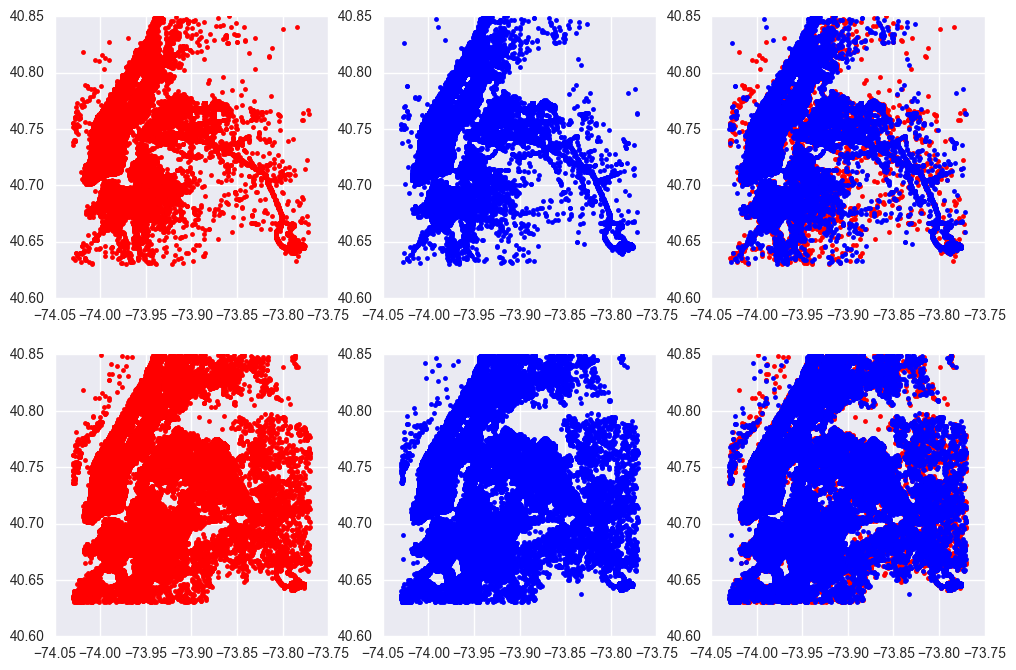

In [314]:
_, ax_vendor_id = plt.subplots(2,3,figsize=(12,8))
ax_vendor_id[0,0].plot(train[train['vendor_id']==1]['pickup_longitude'],train[train['vendor_id']==1]['pickup_latitude'],'.',color='r')
ax_vendor_id[0,1].plot(train[train['vendor_id']==2]['pickup_longitude'],train[train['vendor_id']==2]['pickup_latitude'],'.',color='b')
ax_vendor_id[0,2].plot(train[train['vendor_id']==1]['pickup_longitude'],train[train['vendor_id']==1]['pickup_latitude'],'.',color='r')
ax_vendor_id[0,2].plot(train[train['vendor_id']==2]['pickup_longitude'],train[train['vendor_id']==2]['pickup_latitude'],'.',color='b')
ax_vendor_id[1,0].plot(train[train['vendor_id']==1]['dropoff_longitude'],train[train['vendor_id']==1]['dropoff_latitude'],'.',color='r')
ax_vendor_id[1,1].plot(train[train['vendor_id']==2]['dropoff_longitude'],train[train['vendor_id']==2]['dropoff_latitude'],'.',color='b')
ax_vendor_id[1,2].plot(train[train['vendor_id']==1]['dropoff_longitude'],train[train['vendor_id']==1]['dropoff_latitude'],'.',color='r')
ax_vendor_id[1,2].plot(train[train['vendor_id']==2]['dropoff_longitude'],train[train['vendor_id']==2]['dropoff_latitude'],'.',color='b')

(0, 4)

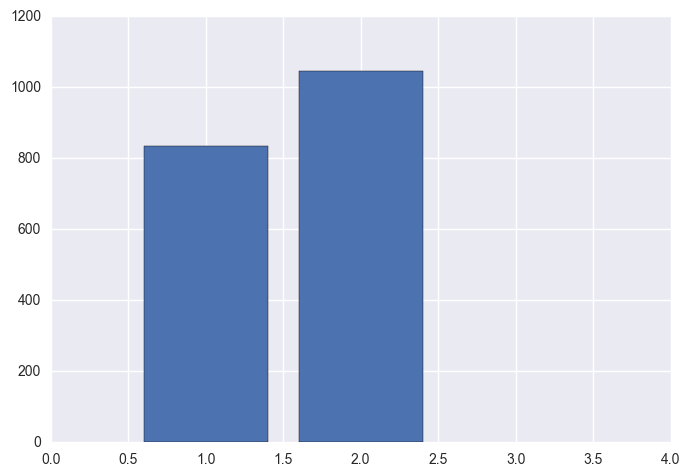

In [298]:
plt.bar([0.6,1.6],vendor_id_period)
plt.xlim(0,4)

In [281]:
#train[train['vendor_id']==1]['trip_duration'].mean()

In [280]:
#train[train['vendor_id']==2]['trip_duration'].mean()

In [279]:
#train[train['vendor_id']==1]['Manhattan distance (miles)'].mean()

In [278]:
#train[train['vendor_id']==2]['Manhattan distance (miles)'].mean()
#plt.plot(np.array(range(0,7)),avg_miles_passenger,'o-.')

In [372]:
### label the test file
test = pd.read_csv('test.csv')

In [377]:
test_pickup_loc=test[['pickup_longitude','pickup_latitude']]
test_dropoff_loc=test[['pickup_longitude','pickup_latitude']]

In [374]:
label_test_pickup=kmeans.predict(test_pickup_loc)

In [378]:
label_test_dropoff=kmeans.predict(test_dropoff_loc)

In [382]:
test['pickup_area']=label_test_pickup
test['dropoff_area']=label_test_dropoff

In [383]:
test.to_csv('test_modified.csv')

In [384]:
del test

___
### 1.9 Split train set to train_part set and validation set
___

In [319]:
#train.info()

In [318]:
train_valid = np.split(train, [1150896], axis=0)

In [321]:
train_valid[0].to_csv('train_part.csv')

In [322]:
train_valid[1].to_csv('train_validation.csv')

In [323]:
del train_valid
#1438621*0.80

___
### 1.8 Neighborehood map
___

In [ ]:
from sklearn import 

In [356]:
neighborhood = {-74.0019368351: 'Chelsea',-73.837549761: 'Queens',-73.7854240738: 'JFK',-73.9810421975:'Midtown-North-West',-73.9862336241: 'East Village',
                -73.971273324:'Midtown-North-East',-73.9866739677: 'Brooklyn-parkslope',-73.8690098118: 'LaGuardia',-73.9890572967:'Midtown',-74.0081765545: 'Downtown'
                ,-73.9213024854: 'Queens-Astoria',-73.9470256923: 'Harlem',-73.9555565018: 'Uppe East Side',
               -73.9453487097: 'Brooklyn-Williamsburgt',-73.9745967889:'Upper West Side'}

In [ ]:
rides_df = pd.DataFrame(columns = neighborhood.values())
rides_df['name'] = neighborhood.values()

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(np.array(list(neighborhood.keys())).reshape(-1, 1), list(neighborhood.values()))